In [1]:
import cPickle
import pylab
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with open("mr3_pa2_s16_results.pickle", "r") as f:
    data = cPickle.load(f)

In [3]:
data.keys()

['respSel',
 'corrLive',
 'scan_freq',
 'resp',
 'rmsLive',
 'sel',
 'corrDark',
 'kurtLive',
 'normDark',
 'live',
 'stable',
 'skewLive',
 'normLive',
 'darkRatioLive',
 'MFELive',
 'dark',
 'ff',
 'jumpDark',
 'gainDark',
 'name',
 'gainLive',
 'DELive',
 'cal',
 'rmsDark',
 'jumpLive',
 'DEDark']

Let's look at some of the interesting statistics
# A look into statistics
## corrLive
Let me look at the corrLive key first

In [4]:
ts = data['corrLive']

In [5]:
sel = (ts>0) & (ts<1)

(array([1.030000e+02, 2.520000e+02, 4.370000e+02, 6.210000e+02,
        8.220000e+02, 1.091000e+03, 1.221000e+03, 1.544000e+03,
        1.728000e+03, 2.069000e+03, 2.445000e+03, 2.547000e+03,
        2.935000e+03, 3.073000e+03, 3.202000e+03, 3.323000e+03,
        3.480000e+03, 3.492000e+03, 3.427000e+03, 3.415000e+03,
        3.375000e+03, 3.325000e+03, 3.146000e+03, 3.155000e+03,
        2.932000e+03, 2.706000e+03, 2.568000e+03, 2.429000e+03,
        2.345000e+03, 2.317000e+03, 2.155000e+03, 2.177000e+03,
        1.936000e+03, 1.775000e+03, 1.673000e+03, 1.567000e+03,
        1.493000e+03, 1.483000e+03, 1.255000e+03, 1.263000e+03,
        1.059000e+03, 1.066000e+03, 9.930000e+02, 9.880000e+02,
        9.040000e+02, 9.870000e+02, 9.160000e+02, 9.070000e+02,
        8.520000e+02, 8.830000e+02, 9.190000e+02, 9.310000e+02,
        9.440000e+02, 9.780000e+02, 1.071000e+03, 1.081000e+03,
        1.202000e+03, 1.235000e+03, 1.288000e+03, 1.407000e+03,
        1.457000e+03, 1.603000e+03, 1.82

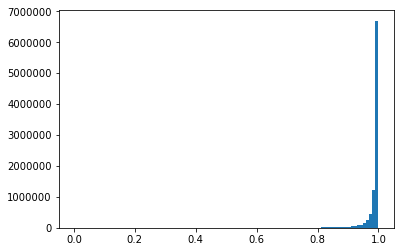

In [6]:
pylab.hist(ts[sel], bins=100)

It looks like that most of the detectors are highly correlated. However, one has to remember that these are all the detectors meaning that some of them are rejected based on this criteria. 

Next Let's try to plot only the selected detectors (uncutted) and only the unselected (cutted) respectively.

In [7]:
sel = data['sel'] ==1
dsel = data['sel'] == 0

(array([1.03000e+02, 2.52000e+02, 4.37000e+02, 6.21000e+02, 8.22000e+02,
        1.09100e+03, 1.22100e+03, 1.54400e+03, 1.72800e+03, 2.06900e+03,
        2.44500e+03, 2.54700e+03, 2.93500e+03, 3.07300e+03, 3.20200e+03,
        3.32300e+03, 3.48000e+03, 3.49200e+03, 3.42700e+03, 3.41500e+03,
        3.37500e+03, 3.32500e+03, 3.14600e+03, 3.15500e+03, 2.93200e+03,
        2.70600e+03, 2.56800e+03, 2.42900e+03, 2.34500e+03, 2.31700e+03,
        2.15500e+03, 2.17700e+03, 1.93600e+03, 1.77500e+03, 1.67300e+03,
        1.56700e+03, 1.49300e+03, 1.48300e+03, 1.25500e+03, 1.26300e+03,
        1.05900e+03, 1.06600e+03, 9.93000e+02, 9.88000e+02, 9.04000e+02,
        9.87000e+02, 9.16000e+02, 9.07000e+02, 8.52000e+02, 8.83000e+02,
        9.19000e+02, 9.31000e+02, 9.44000e+02, 9.78000e+02, 1.07100e+03,
        1.08100e+03, 1.20200e+03, 1.23500e+03, 1.28800e+03, 1.40700e+03,
        1.45700e+03, 1.60300e+03, 1.82100e+03, 1.81700e+03, 1.99100e+03,
        2.24600e+03, 2.28000e+03, 2.51800e+03, 2.79

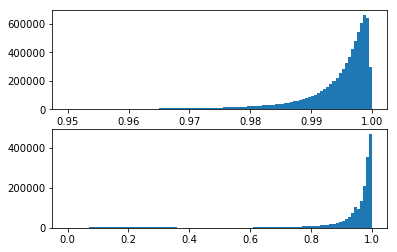

In [8]:
plt.subplot(2,1,1)
plt.hist(ts[sel], bins=100)
plt.subplot(2,1,2)
# for deselect let's get rid of numerical errors (peaks at 0 and 1)
ts_dsel = ts[dsel]
ts_dsel = ts_dsel[(ts_dsel<1)&(ts_dsel>0)]
plt.hist(ts_dsel, bins=100)

What one can see is that in the cutted region, it extends to lower correlation while for the uncutted (good) ones, it is sharply concentrated in the upper 5% correlation region. It means that 95% correlation threshold is used, but there are other criteria.

Next Let's look at a different statistics
## rmsLive

In [9]:
# With the previous study, we will go faster on this one and we will define a generic function

def study_stats(tag, cutoff, low=0):
    ts = data[tag]
    sel = (ts>low) & (ts<cutoff)
    #plt.subplot(3,1,1)
    plt.figure()
    plt.hist(ts[sel], bins=100)
    plt.xlabel(tag+", all")
    
    sel = data['sel'] ==1
    dsel = data['sel'] == 0
    #plt.subplot(3,1,2)
    plt.figure()
    sel = sel & ((ts>low) & (ts<cutoff))
    plt.hist(ts[sel], bins=100)
    plt.xlabel(tag+", sel=1")
    
    #plt.subplot(3,1,3)
    plt.figure()
    dsel = dsel & ((ts>low) & (ts<cutoff))
    plt.hist(ts[dsel], bins=100)
    plt.xlabel(tag+", sel=0")
    

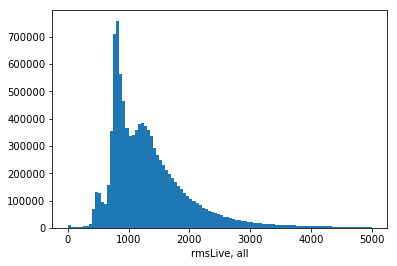

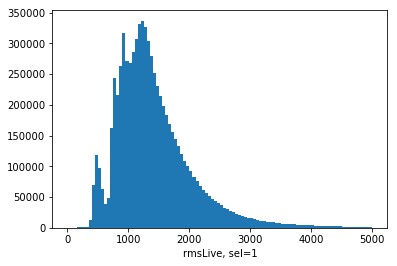

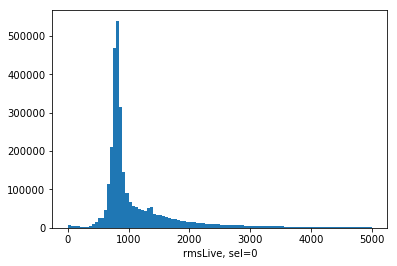

In [10]:
study_stats('rmsLive', 5e3)

One thing interesting is that sel=1 detectors have a peak that higher in rms than sel=0 detector, and sel=1 does look smoother, however, no clear cutoff thresholds are visible. 

Let's look at another stats
## kurtLive

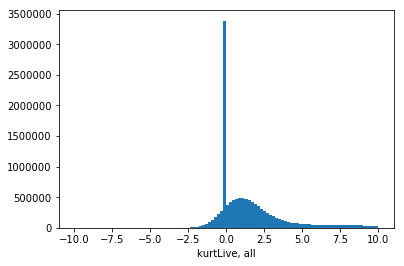

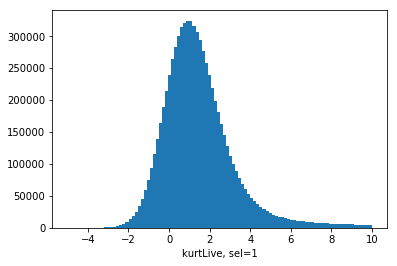

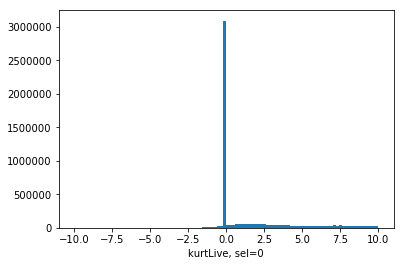

In [11]:
study_stats('kurtLive', 10,-10)

This is very interesting. The central peak is cut off, and the selected detectors have an extremely smooth curve, which I find remarkable. A comparison without the peak looks like the following

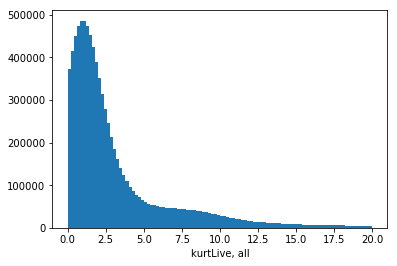

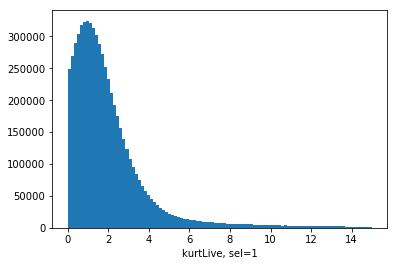

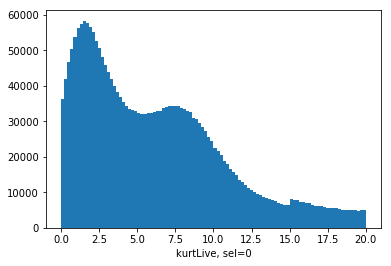

In [12]:
study_stats('kurtLive', 20,0)

One thing that can be seen is that the selected detectors drop master in higher kurtosis. Seems to indicate a bias made towards lower kurtosis in the preprocessing process. 

Update from Feb 3, 2018: I notice a cut at 15.0.
## corrDark

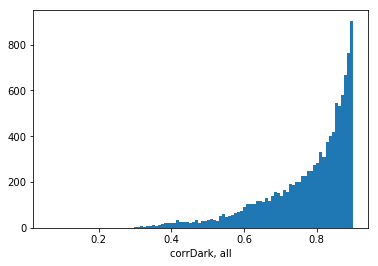

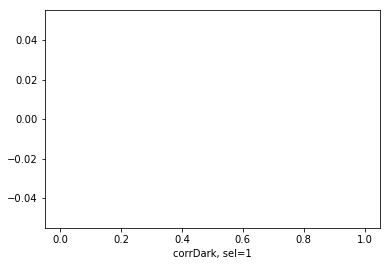

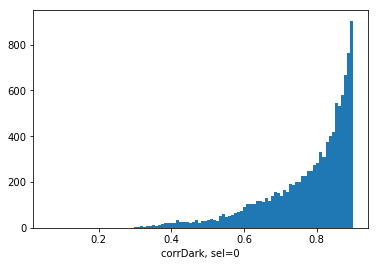

In [13]:
study_stats('corrDark', 0.9)

Selected detectors have no darkCorr defined? Interesting!

## resp
Responsitivity

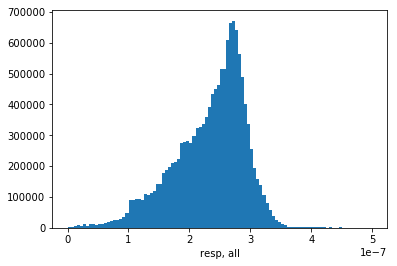

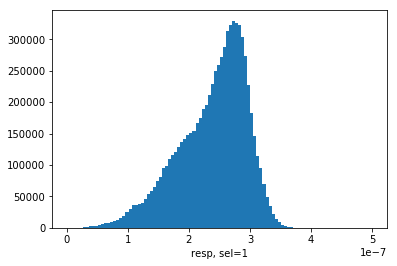

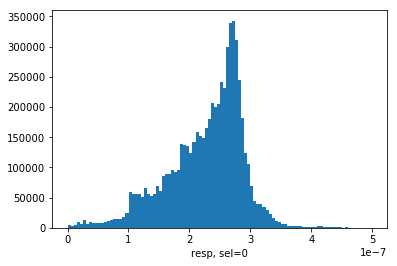

In [14]:
study_stats('resp', 5e-7)

The selected detectors have a very nice histogram. However, I am curious as in what causes the central peak (at around 1.8e-7) that has been removed (shown in the unselected).  

## ff
Flatfield

(array([  6.,  15.,  24.,  30.,  39.,  51.,  50.,  56., 333.,  58.,  36.,
         30.,  29.,  26.,  23.,  28.,   7.,  16.,  15.,  15.,  15.,   6.,
         11.,  13.,  10.,  14.,   4.,   4.,   9.,   7.,   4.,   4.,   1.,
          4.,   4.,   7.,   0.,   1.,   4.,   4.,   4.,   3.,   4.,   3.,
          2.,   2.,   1.,   1.,   1.,   2.,   1.,   3.,   2.,   2.,   0.,
          0.,   3.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.80219534, 0.82680297, 0.85141061, 0.87601825, 0.90062589,
        0.92523352, 0.94984116, 0.9744488 , 0.99905644, 1.02366407,
        1.04827171, 1.07287935, 1.09748699, 1.12209462, 1.14670226,
        1.1713099 , 1.19591754, 1.22052517, 1.24513281, 1.26974045,
        1.29434809, 1.31895572, 1.34356336, 1.

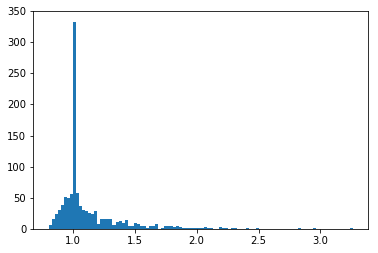

In [15]:
plt.hist(data['ff'], bins=100)

I also don't understand flatfield. 

## normLive

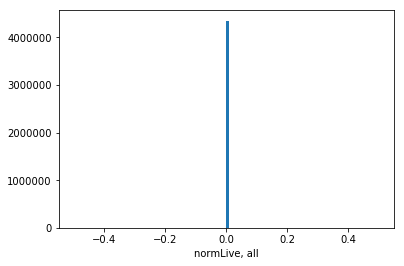

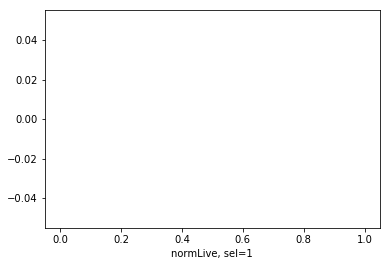

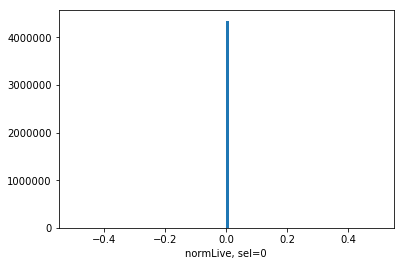

In [16]:
study_stats('normLive', 1, -1)

I don't understand what is this. 

## DEDark
Drift error dark

In [17]:
data['DEDark'].shape

(13032,)

This is a per TOD quantity


In [18]:
data['DEDark'][data['DEDark'] != None]

array([], dtype=object)

This is all filled with None, maybe it's worthing checking the other pickle file

## darkRatioLive


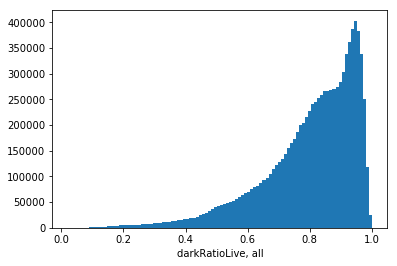

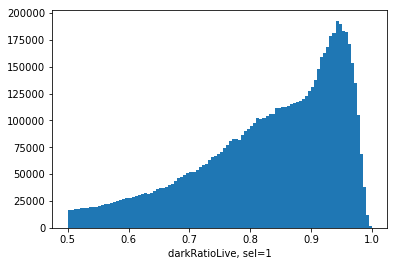

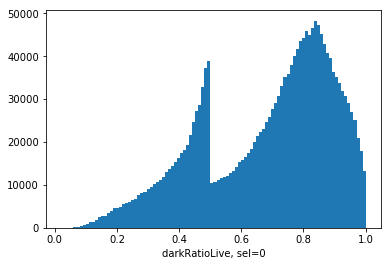

In [19]:
study_stats('darkRatioLive', 1)

Clearly dark ratio is trancated when considering. However i don't understand the last plot at all. -> Update from Feb 3, I think i understand now, the shape below .5 shows that these are untouched and simply truncated. Above .5 it is selected, but only a subset is selected, thus this shape. One does dark ratio mean?

## jumpLive

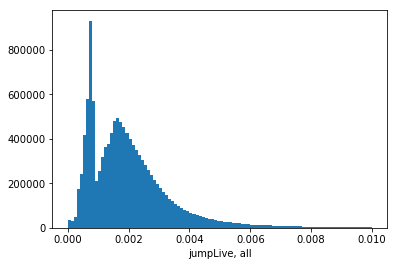

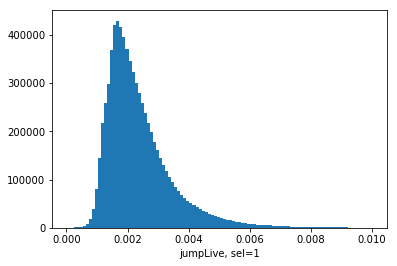

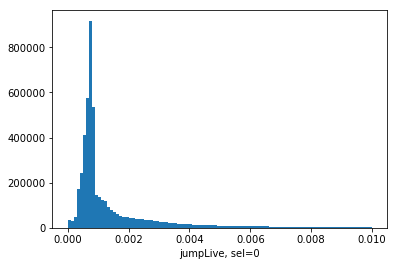

In [20]:
study_stats('jumpLive', 1e-2)

Once again, i don't fully understand the meaning of this. The selected detectors seem to have a wider shape than the unselected. However, it has a nicer shape. 

What's interesting is that it seems that the data reduction rate is very high, which means that a large fraction of data isn't get used. Let me calculate that ratio below

In [21]:
# Calculate the ratio of used detector data verses total

uniqs, counts = np.unique(data['sel'], return_counts=True)
tb = dict(zip(uniqs, counts))
print "Total detector data unused: %d" % tb[0]
print "Total detector data used: %d" % tb[1]
print "Percentage of data used:", round((tb[1]*1.0/(tb[0]+tb[1])*100.0),2), "%"

Total detector data unused: 6273563
Total detector data used: 7488229
Percentage of data used: 54.41 %


# Correlation between stats
Given the individual statistics. It would be interesting to look into their correlation to understand the physics behind it. Before I start, let me get the utility function ready. 



In [22]:
def get_selected(tag):
    sel = (data['sel']==1)
    return data[tag][sel]

def get_all(tag):
    sel = (data['sel']==1) | (data['sel']==0)
    return data[tag][sel]

def get_unselected(tag):
    sel = (data['sel']==0)
    return data[tag][sel]

## darkRatio vs. rmsLive
Intuitively, darkRatio reflects the level of thermal contamination. When thermal contamination is high, the rms should also be higher. It would be interesting to look at this statistical correlation



In [23]:
data_1 = get_selected('darkRatioLive')
data_2 = get_selected('rmsLive')
print data_1.shape
print data_2.shape

(7488229,)
(7488229,)


(array([[ 1.,  1.,  1., ..., 23., 24., 30.],
        [ 1.,  2.,  1., ..., 30., 33., 27.],
        [ 0.,  0.,  0., ..., 33., 24., 21.],
        ...,
        [ 0.,  0.,  0., ..., 11., 13., 14.],
        [ 0.,  0.,  0., ...,  3.,  2.,  3.],
        [ 0.,  0.,  0., ...,  1.,  1.,  1.]]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
        0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
        0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
     

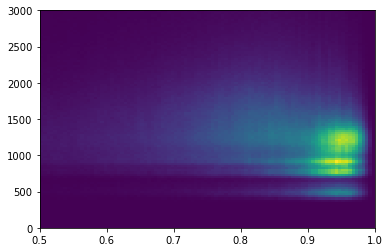

In [24]:
plt.hist2d(data_1, data_2, bins=100, range=[[0.5, 1], [0, 3e3]])

It looks like these two variables are surprisingly uncorrelated. However I may be wrong. Let me be more quantitative.

In [25]:
np.corrcoef(data_1, data_2)

array([[ 1.        , -0.18760533],
       [-0.18760533,  1.        ]])

Let me look at the total list instead of the selected to see if the correlated part is removed. 

(array([[ 4.,  8.,  6., ..., 36., 33., 41.],
        [ 6.,  8., 10., ..., 41., 48., 32.],
        [ 7.,  9.,  2., ..., 43., 36., 29.],
        ...,
        [53., 19., 11., ..., 14., 21., 18.],
        [79.,  5.,  7., ..., 11., 11.,  8.],
        [57.,  3.,  5., ...,  6.,  5.,  5.]]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
        0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
        0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
     

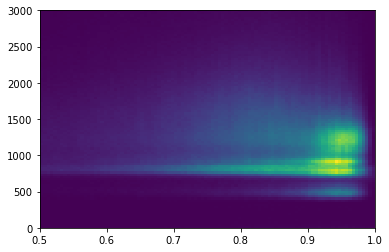

In [26]:
data_1 = get_all('darkRatioLive')
data_2 = get_all('rmsLive')
plt.hist2d(data_1, data_2, bins=100, range=[[0.5, 1], [0, 3e3]])

This looks more correlated. Let me be more precise and study correlation quantitatively. 

In [27]:
np.corrcoef(data_1, data_2)

array([[ 1.        , -0.03185669],
       [-0.03185669,  1.        ]])

Surprisingly, it is less correlated. Maybe it's due to having more statistics. 

## corrLive vs. darkRatioLive

In [28]:
def study_corr(tag_1, tag_2, select=1, limit=[[0,1],[0,1]]):
    print "Studying correlation between [ %s, %s ] ..." % (tag_1, tag_2)
    if select==1:
        print "Choosing only selected ..."
        data_1 = get_selected(tag_1)
        data_2 = get_selected(tag_2)
    elif select==0:
        print "Choosing only unselected ..."
        data_1 = get_unselected(tag_1)
        data_2 = get_unselected(tag_2)
    else:
        print "Choosing all ..."
        data_1 = get_all(tag_1)
        data_2 = get_all(tag_2)
    
    plt.hist2d(data_1, data_2, bins=100, range=limit)
    plt.xlabel(tag_1)
    plt.ylabel(tag_2)
    print "Correlation matrix: "
    print np.corrcoef(data_1, data_2)
    

Studying correlation between [ corrLive, darkRatioLive ] ...
Choosing only selected ...
Correlation matrix: 
[[1.         0.20907117]
 [0.20907117 1.        ]]


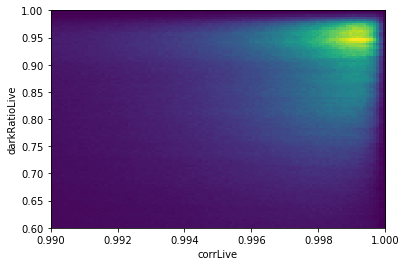

In [29]:
study_corr('corrLive', 'darkRatioLive', select=1, limit=[[0.99,1],[0.6,1]])

Studying correlation between [ corrLive, darkRatioLive ] ...
Choosing all ...
Correlation matrix: 
[[ 1.         -0.44782152]
 [-0.44782152  1.        ]]


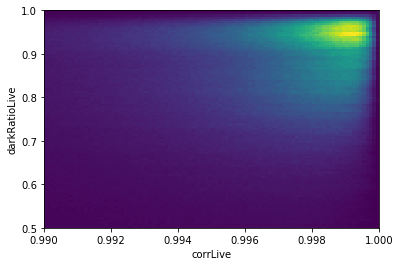

In [30]:
study_corr('corrLive', 'darkRatioLive', select=-1, limit=[[0.99,1],[0.5,1]])

Here the correlation is visible. The tilted line implies correlation. 

On the side note, one flaw i had when calculating correlation matrix is that I didn't perform any cut before calculating. The numerical overflows (i.e. huge peak at 0, etc) will pollute the physics picture. 

## More correlations

In [31]:
def get_corr(taglist):
    data_list = []
    for tag in taglist:
        data_list.append(get_selected(tag))
    data_vs = np.vstack(data_list)
    print "Tags: ", taglist
    return np.corrcoef(data_vs)

In [32]:
# Compile tag list
taglist = [key for key in data.keys() if (type(data[key]) is np.ndarray and len(data[key].shape)==2)]
print taglist

['respSel', 'corrLive', 'resp', 'rmsLive', 'sel', 'corrDark', 'kurtLive', 'normDark', 'skewLive', 'normLive', 'darkRatioLive', 'MFELive', 'jumpDark', 'gainDark', 'gainLive', 'DELive', 'cal', 'rmsDark', 'jumpLive']


In [33]:
corr = get_corr(taglist)

Tags:  ['respSel', 'corrLive', 'resp', 'rmsLive', 'sel', 'corrDark', 'kurtLive', 'normDark', 'skewLive', 'normLive', 'darkRatioLive', 'MFELive', 'jumpDark', 'gainDark', 'gainLive', 'DELive', 'cal', 'rmsDark', 'jumpLive']


/Users/yguan/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/yguan/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


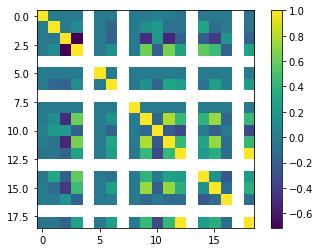

In [34]:
im = plt.imshow(corr)
plt.colorbar(im)

In [42]:
thres = 0.5
for i in range(len(taglist)):
    for j in range(i):
        if abs(corr[i,j]) > thres:
            print "Highly correlated:\t[%s, %s]\t corr_coef = %.2f" %(taglist[i], taglist[j], corr[i,j])

Highly correlated:	[rmsLive, resp]	 corr_coef = -0.71
Highly correlated:	[normLive, rmsLive]	 corr_coef = 0.62
Highly correlated:	[MFELive, resp]	 corr_coef = -0.53
Highly correlated:	[MFELive, rmsLive]	 corr_coef = 0.65
Highly correlated:	[MFELive, normLive]	 corr_coef = 0.80
Highly correlated:	[gainLive, rmsLive]	 corr_coef = 0.58
Highly correlated:	[DELive, normLive]	 corr_coef = 0.73
Highly correlated:	[DELive, MFELive]	 corr_coef = 0.73
Highly correlated:	[jumpLive, jumpDark]	 corr_coef = 1.00


This is very interesting. A better understanding of the highly correlated variables are thus the next things to study. For convenience, improve the study function as below

In [40]:
def get_corr_v2(taglist, select=1):
    data_list = []
    for tag in taglist:
        if select==1:
            data_list.append(get_selected(tag))
        elif select==0:
            data_list.append(get_unselected(tag))
        else:
            data_list.append(get_all(tag))

    data_vs = np.vstack(data_list)
    #print "Tags: ", taglist
    corr = np.corrcoef(data_vs)
    
    # Show plot
    im = plt.imshow(corr)
    plt.colorbar(im)
    
    # Show correlation results
    thres = 0.5
    for i in range(len(taglist)):
        for j in range(i):
            if abs(corr[i,j]) > thres:
                print "Highly correlated:\t[%s, %s]\t corr_coef = %.2f" %(taglist[i], taglist[j], corr[i,j])


Highly correlated:	[sel, respSel]	 corr_coef = 0.63
Highly correlated:	[darkRatioLive, respSel]	 corr_coef = 0.77
Highly correlated:	[darkRatioLive, sel]	 corr_coef = 0.79
Highly correlated:	[MFELive, rmsLive]	 corr_coef = 0.68
Highly correlated:	[gainDark, corrDark]	 corr_coef = -0.81
Highly correlated:	[DELive, MFELive]	 corr_coef = 0.53
Highly correlated:	[cal, respSel]	 corr_coef = -0.63
Highly correlated:	[cal, sel]	 corr_coef = -1.00
Highly correlated:	[cal, darkRatioLive]	 corr_coef = -0.79
Highly correlated:	[rmsDark, jumpDark]	 corr_coef = 0.82
Highly correlated:	[jumpLive, jumpDark]	 corr_coef = 1.00
Highly correlated:	[jumpLive, rmsDark]	 corr_coef = 0.82


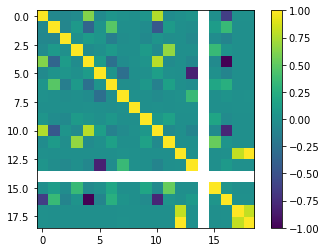

In [41]:
get_corr_v2(taglist, select=-1)

There are more correlation before the cut. It's good to know that present cut pipeline is able to cut down correlated noises. 